# AIML Module Project - Unsupervised Learning - Project 1 - Part I

## Problem Statement: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

<b>Data Import & preprocessing</b>

In [1]:
# Imports

import pandas as pd
import numpy as np

In [2]:
# Import the data

df1=pd.read_json("Part1 - Car-Attributes.json")
df1.head()

,acc,cyl,disp,hp,mpg,origin,wt,yr
0,12.0,8,307.0,130,18.0,1,3504,70
1,11.5,8,350.0,165,15.0,1,3693,70
2,11.0,8,318.0,150,18.0,1,3436,70
3,12.0,8,304.0,150,16.0,1,3433,70
4,10.5,8,302.0,140,17.0,1,3449,70


In [3]:
df2 = pd.read_csv("Part1 - Car name.csv")

In [4]:
df = pd.concat((df1, df2), axis=1)

In [5]:
df.shape

(398, 9)

In [6]:
df.head()

,acc,cyl,disp,hp,mpg,origin,wt,yr,car_name
0,12.0,8,307.0,130,18.0,1,3504,70,chevrolet chevelle malibu
1,11.5,8,350.0,165,15.0,1,3693,70,buick skylark 320
2,11.0,8,318.0,150,18.0,1,3436,70,plymouth satellite
3,12.0,8,304.0,150,16.0,1,3433,70,amc rebel sst
4,10.5,8,302.0,140,17.0,1,3449,70,ford torino


Attribute Information: Understanding the abbreviations

1. mpg: miles per gallon: continuous # <b>The 'y' variable</b>
2. cyl: cylinders: multi-valued discrete
3. disp: displacement: continuous
4. hp: horsepower: continuous
5. wt: weight: continuous
6. acc: acceleration: continuous
7. yr: model year: multi-valued discrete
8. origin: origin: multi-valued discrete


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
acc         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
mpg         398 non-null float64
origin      398 non-null int64
wt          398 non-null int64
yr          398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


As we can see, horsepower is an object whereas it should have been an integer or float. We need to find out why so and treat this inconsistency!

In [8]:
df['hp'].isnull().sum()

0

Hmm, so horsepower doesn't have any missing or null values. So, we need to check the unique values to see what's causing this.

In [9]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

Alright, so '?' is the culprit. We could have replaced '?' with mean, median or mode but this will lead to <b>data leakage</b> as we don't have separate data kept for validation. Hence, we are going to simple drop the rows with '?' and check the shape of the data

In [10]:
df = df[df['hp'] != '?']
print(df.shape)

(392, 9)


So, we lose only 6 rows, not that significant. So, we will go with this simple apprach of dropping the '?' rows. We still need to change the datatype of the hp column.

In [11]:
df['hp'] = df['hp'].astype('float')
print(df.dtypes)

acc         float64
cyl           int64
disp        float64
hp          float64
mpg         float64
origin        int64
wt            int64
yr            int64
car_name     object
dtype: object


In [12]:
df.isnull().sum()

acc         0
cyl         0
disp        0
hp          0
mpg         0
origin      0
wt          0
yr          0
car_name    0
dtype: int64

<b>EDA</b>

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


Let's dig into the target column distribution in more detail

In [14]:
df['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

The value of mpg is between [9, 46.6] with a mean of 23.44 and varies by 7.8 The median mpg i.e. 22.75 is quite close to the mean, indicating that the distribution of mpg is symmetric.

In [15]:
import seaborn as sns

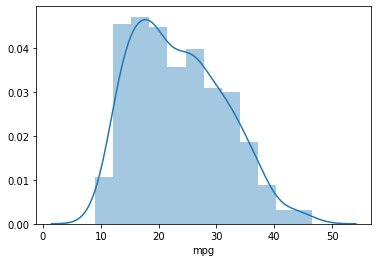

In [16]:
sns.distplot(df['mpg'])

As we can see from the histogram of mpg, the data is moderately skewed to the right. This implies that the there are more number of cars which have low mpg than those with high mpg.

This is evident from the histogram as well.

Let us take a look at how mpg changes with respect to year i.e. have cars become more efficient over the years?

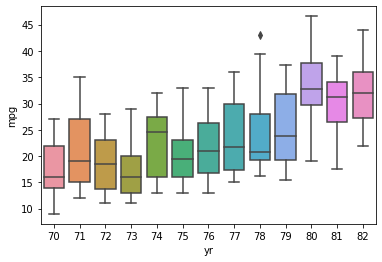

In [17]:
sns.boxplot(x='yr', y='mpg', data=df)

We notice that cars have indeed become more efficient as time has passed. A reasonable assumption since technology advanced and made manufacturing of more efficient engines possible.

In the 80s, the median mpg is more than the 75 percentile of all previous years vehicles.

We can also explore how mpg and acceleration varies with the number of cylinders.

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

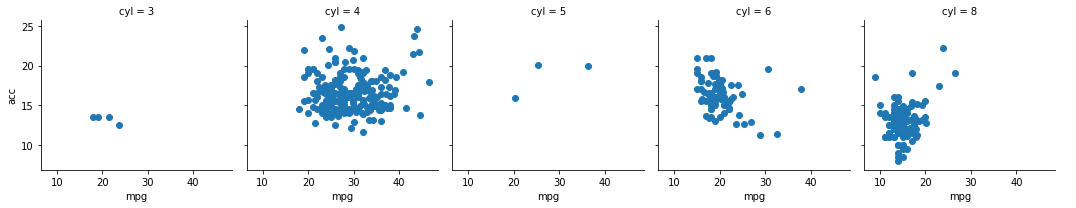

In [19]:
g = sns.FacetGrid(data=df, col='cyl')
g.map(plt.scatter, 'mpg','acc').add_legend()

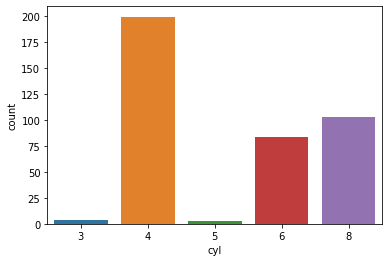

In [20]:
sns.countplot(df['cyl'])

It is evident that maximum cars in our sample are having 4 cylinders, followed by 8 and 6. Rest are really sparse.

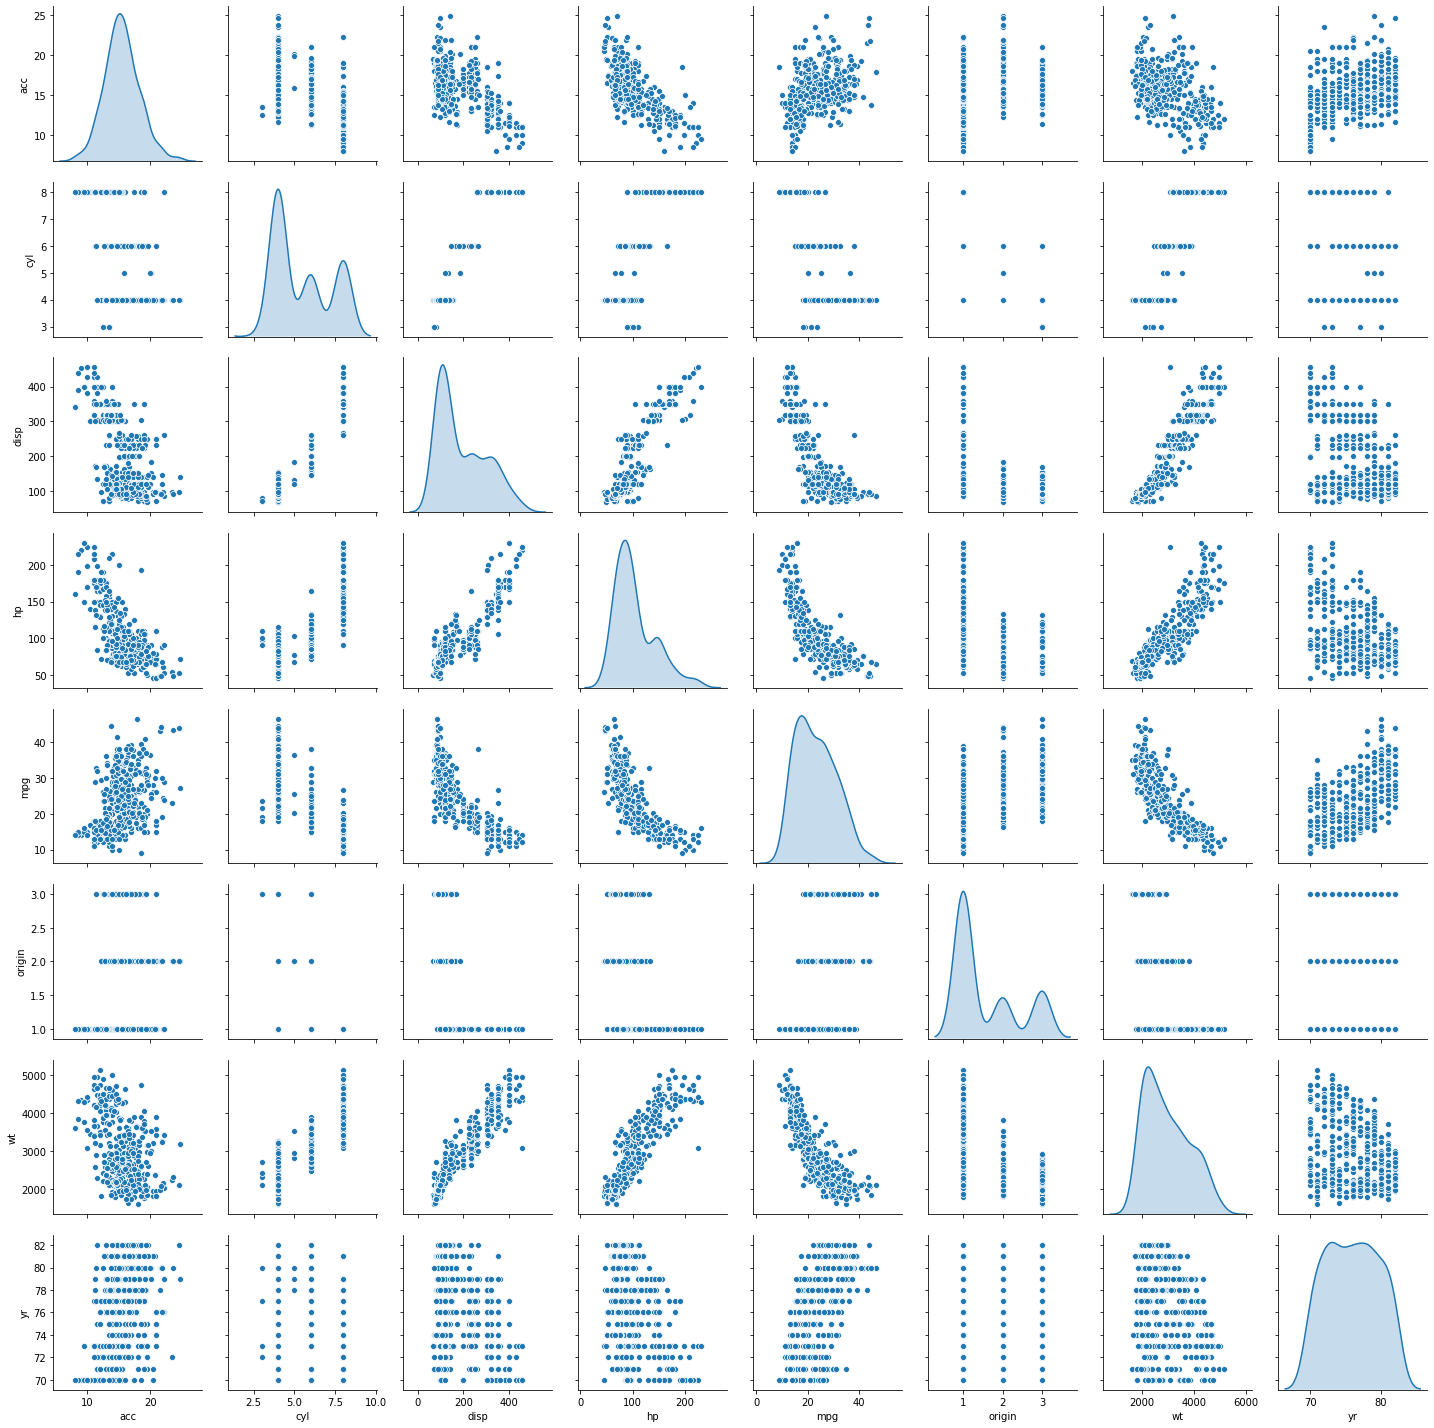

In [21]:
sns.pairplot(df, diag_kind ='kde')

Looking at <b>individual distribution</b>, we see that <b>acceleration</b> and <b>year</b> are <b>normally distributed</b>, while <b>mpg</b> and <b>weight</b> are slightly <b>right skewed</b>. <b>Cylinders</b>, <b>displacement</b>, <b>horsepower</b> and <b>origin</b> are having multiple peaks and hence suggest a <b>multimodal distribution</b>.

<br>Now coming to the <b>correlation</b>, the following correlations are evident:

- <b>miles per gallon</b> or <b>mileage of a car</b> is having a strong negative correlation with displacement, horsepower and weight. This is in sync with what we know from cars in general, i.e heavier & powerful cars have low mileage in general. It also shows that mileage in cars have increased in general over the years. 
- <b>acceleration</b> is having a moderate to low negative correlation with cylinders, displacement, horsepower and weight. Acceleration in cars too have increased in general over the years looks like. 
- <b>horsepower</b> and <b>displacement</b> are having a strong positive correlation amongst one another. Similarly <b>weight</b> of a car is having a strong positive correlation with horsepower and displacement. In short, weight, displacement and horsepower are not that <b>independent</b> of each other!

<b> MACHINE LEARNING</b> # Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data.

K Means

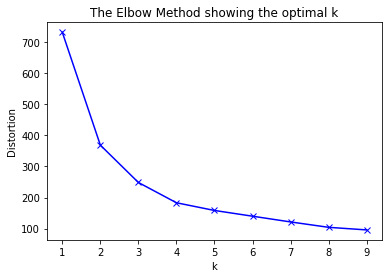

In [22]:


from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# We are dropping car name. We could try label encoder or some text 
# preprocessing techniques to extract unique values
df_final = df.drop(['car_name'],axis=1) 

# We are making use of cdist function to calculate errors.
# Kmeans.inertia_ can also be used here
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_final)
    kmeanModel.fit(df_final)
    distortions.append(
        sum(np.min(cdist(df_final, 
                   kmeanModel.cluster_centers_, 'euclidean'), 
                   axis=1)) / df_final.shape[0])

import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### So our optimal k=3 since  the distortion decreases by small amounts after iteration no. 3 suggesting that the algorithm has almost converged and we can stop with 3 iterations to save computational power and time.

In [23]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_final)
kmeans.labels_

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2,

In [24]:
df_final['label'] = kmeans.labels_
df_final.head()

,acc,cyl,disp,hp,mpg,origin,wt,yr,label
0,12.0,8,307.0,130.0,18.0,1,3504,70,0
1,11.5,8,350.0,165.0,15.0,1,3693,70,1
2,11.0,8,318.0,150.0,18.0,1,3436,70,0
3,12.0,8,304.0,150.0,16.0,1,3433,70,0
4,10.5,8,302.0,140.0,17.0,1,3449,70,0


In [25]:
pd.crosstab(df_final['label'],df_final['origin'])

origin,1,2,3
label,,,
0,96,17,9
1,89,1,0
2,60,50,70


In [26]:
pd.crosstab(df_final['label'],df_final['cyl'])

cyl,3,4,5,6,8
label,,,,,
0,1,27,3,72,19
1,0,0,0,6,84
2,3,172,0,5,0


Hierarchical Clustering

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

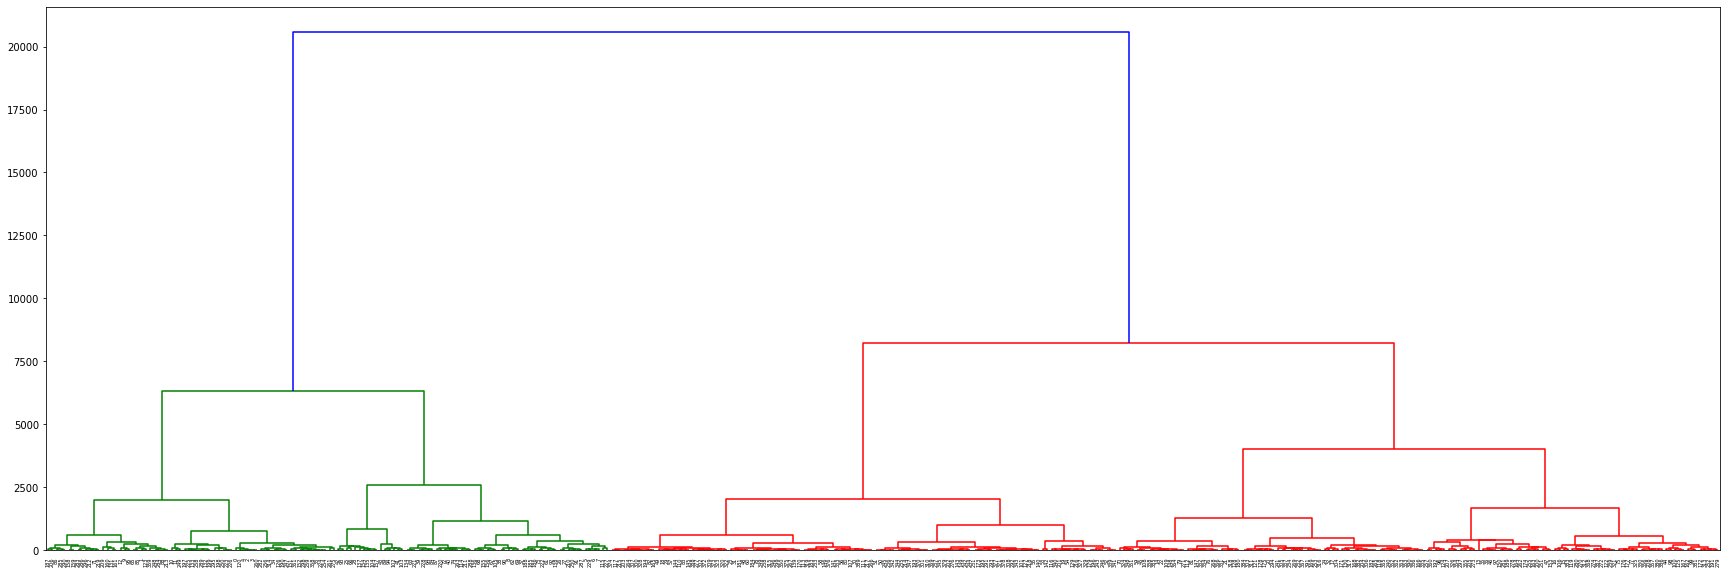

In [28]:
plt.figure(figsize=(30,10))
mergings = linkage(df_final, method = "ward", metric='euclidean')
dendrogram(mergings)
plt.show()

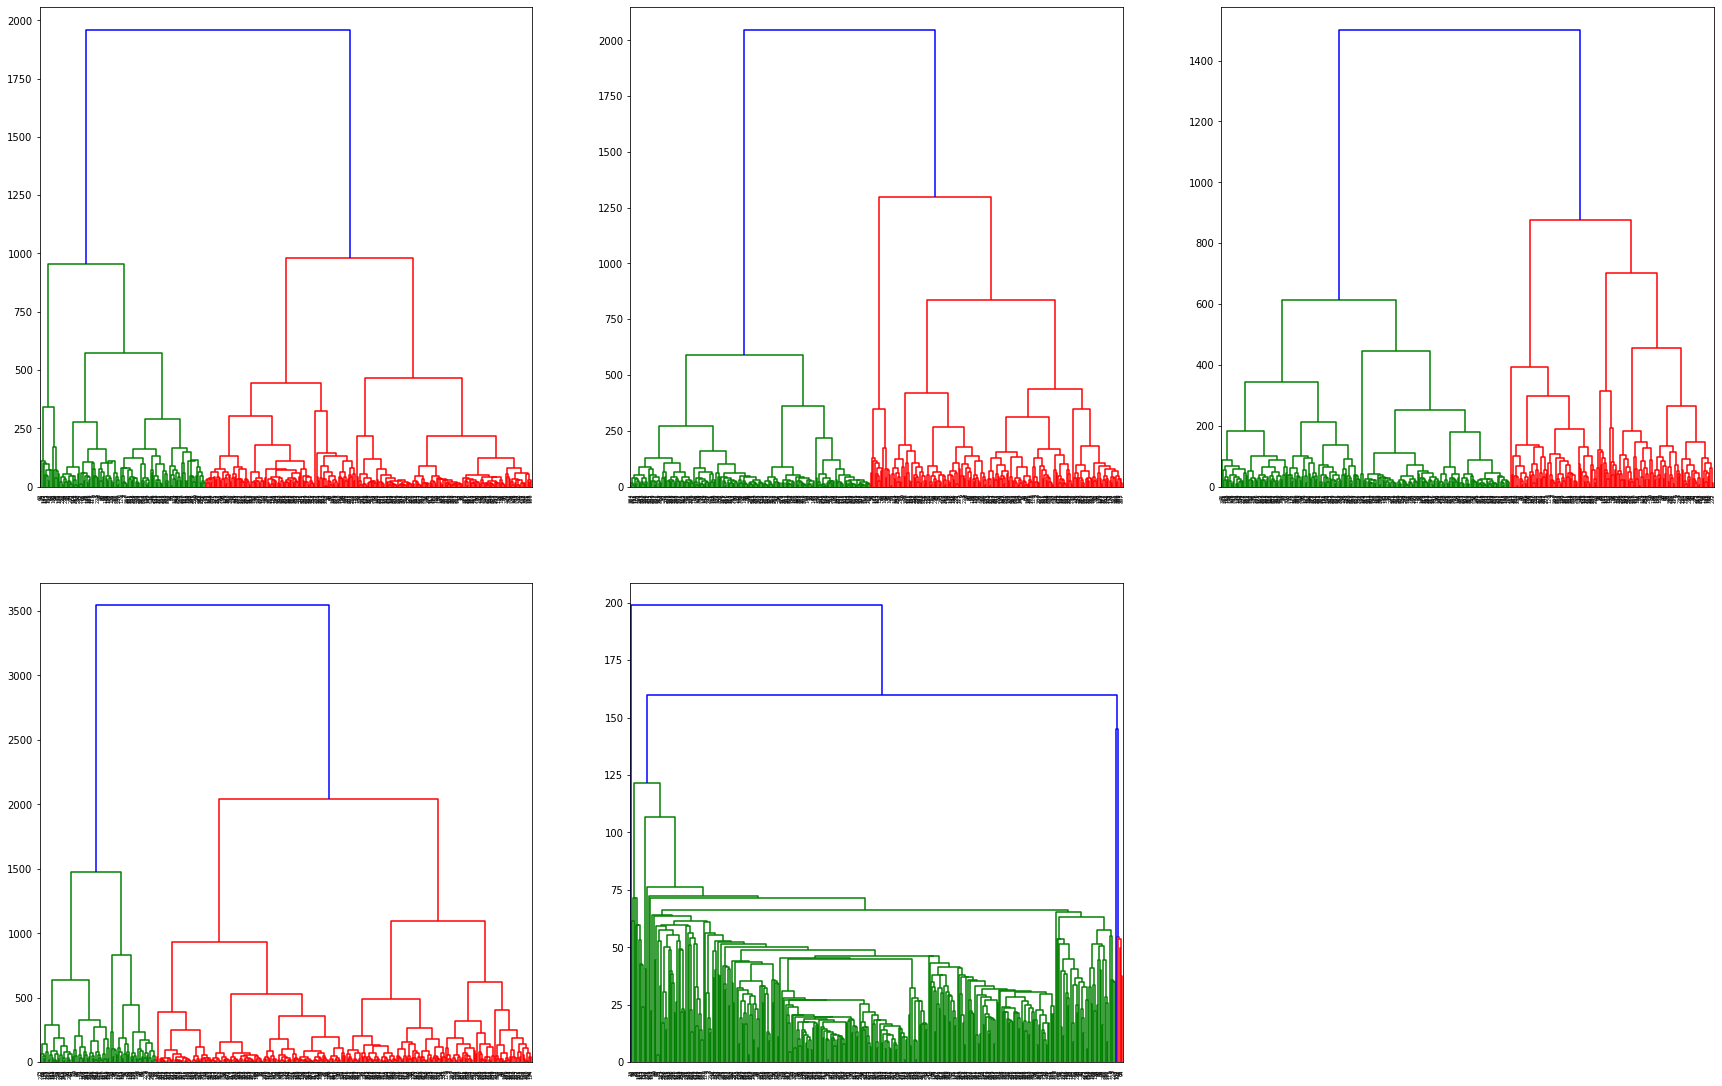

In [29]:
plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
mergings = linkage(df_final, method = "median", metric='euclidean')
dendrogram(mergings)
plt.subplot(3,3,2)
mergings = linkage(df_final, method = "weighted", metric='euclidean')
dendrogram(mergings)
plt.subplot(3,3,3)
mergings = linkage(df_final, method = "average", metric='euclidean')
dendrogram(mergings)
plt.subplot(3,3,4)
mergings = linkage(df_final, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.subplot(3,3,5)
mergings = linkage(df_final, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

<b>Insights on the optimal number of clusters</b> 

Using the elbow method, we saw in K means clustering that the optimum number of clusters looks to be 3 or 5. Even from the dendograms, a similar insight is obtained, i.e the optimum number of clusters looks to be 3 or 4. In the dataset, there are total 3 origins, so we can establish that 3-4 should be the ideal number of clusters for this dataset.

<b>Using Linear Regression on clusters</b>

In [74]:
from sklearn.model_selection import train_test_split
data_X = df_final.drop(['mpg', 'label'],axis=1)
data_y = df_final['mpg']
xtrain, xtest, ytrain, ytest = train_test_split(data_X,data_y,test_size = 0.2)
df_final.shape

(392, 9)

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print("Train accuracy:",model.score(xtrain,ytrain))
print("\nTest accuracy",model.score(xtest,ytest))

Train accuracy: 0.8229315865893271

Test accuracy 0.8017965860413283


In [85]:
# Let's build separate model for each cluster
data1 = df_final[df_final.loc[:,'label'] == 0]
data1.shape

(122, 9)

In [86]:
data1_X = data1.drop(['mpg', 'label'],axis=1)
data1_y = data1['mpg']
data1_xtrain, data1_xtest, data1_ytrain, data1_ytest = train_test_split(data1_X,data1_y,test_size = 0.2)

In [87]:
Lreg = LinearRegression()
Lreg.fit(data1_xtrain,data1_ytrain)
#data1_ypred = Lreg.predict(data1_xtest)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
print("Train accuracy:",Lreg.score(data1_xtrain, data1_ytrain))
print("\nTest accuracy",Lreg.score(data1_xtest, data1_ytest))

Train accuracy: 0.6077105151909383

Test accuracy 0.5573289138908359


In [112]:
data2 = df_final[df_final.loc[:,'label'] == 1]
data2.shape

(90, 9)

In [116]:
data2_X = data2.drop(['mpg', 'label'],axis=1)
data2_y = data2['mpg']
data2_xtrain, data2_xtest, data2_ytrain, data2_ytest = train_test_split(data2_X,data2_y,test_size = 0.3)
Lreg2 = LinearRegression()
Lreg2.fit(data2_xtrain,data2_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
print("Train accuracy:",Lreg.score(data2_xtrain, data2_ytrain))
print("\nTest accuracy",Lreg.score(data2_xtest, data2_ytest))

Train accuracy: -1.7009270981020317

Test accuracy -0.7819092544332149


In [118]:
data3 = df_final[df_final.loc[:,'label'] == 2]
data3.shape

(180, 9)

In [120]:
data3_X = data3.drop(['mpg', 'label'],axis=1)
data3_y = data3['mpg']
data3_xtrain, data3_xtest, data3_ytrain, data3_ytest = train_test_split(data3_X,data3_y,test_size = 0.2)
Lreg3 = LinearRegression()
Lreg3.fit(data3_xtrain,data3_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
print("Train accuracy:",Lreg.score(data3_xtrain, data3_ytrain))
print("\nTest accuracy",Lreg.score(data3_xtest, data3_ytest))

Train accuracy: 0.5228834339213296

Test accuracy 0.49491444470987545


- We can see that the original model is performing much better than the individual models
- Here, since there is high correlation between target and independent features we do not need cluster information to build a good regression model.
- We can use clustering to understand how different types are cars are influnced by various independent features
Dataset size is quite less for individual models